Joshua Kearstan

Data Science for Chemical Engineering Test 2
Instructor: Prof. Okolie

Select Today's Date

2024/09/30
Date: 2024-09-30

Instructions:
This is an open-book exam.
You are required to download the dataset and perform exploratory data analysis (EDA) using Python.
Your analysis should include data cleaning, visualization, and preparing the dataset for machine learning tasks in the future.
Ensure you comment on your code.
The test will last for 60 minutes.
Once completed, submit a link to your GitHub repository with your code and findings on Moodle.
Question:
You are provided with a dataset on Dry Reforming of Methane. Dry reforming of methane (DRM) is an important process used to convert methane (CH₄) and carbon dioxide (CO₂) into synthesis gas (syngas), which is a mixture of hydrogen (H₂) and carbon monoxide (CO).

This process is particularly important because it utilizes two greenhouse gases, methane and carbon dioxide, and converts them into valuable chemical products.

Dataset:
Download the dataset provided below, which includes various parameters affecting the DRM process, such as catalyst type, methane conversion, and syngas ratio. Use this dataset to answer the following:

Perform data inspection and identify any missing or inconsistent values.
Handle any missing data using appropriate techniques (e.g., fill missing values or remove incomplete rows).
Apply data transformation techniques, such as normalization or encoding categorical variables, to prepare the data for machine learning tasks.
Generate summary statistics (mean, median, standard deviation, etc.) for the dataset.
Create visualizations (scatter plots, histograms, box plots) to identify trends and relationships between variables.
Analyze the correlations between features and target variables (CH₄ Conversion, CO₂ Conversion, and Syngas Ratio).

In [ ]:
import pandas as pd


# Insert File Path
file_path = '/content/Biomass Gasification Dataset (1).xlsx'


# Read the Excel file
df = pd.read_excel(file_path)


# Print the first few rows of the DataFrame
print("The first 5 rows of the dataset:")
print(df.head())


# Print the description of the dataset
print("The descriptive statistics of the dataset")
print(df.describe())


# Get the data types of all columns
data_types = df.dtypes
print("The data types of each column:")
print(data_types)


# Get the numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
# Get the categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
# Print the results
print("Numeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)

The first 5 rows of the dataset:
          feed Type of Feed      C     H     N    S      O  ASH  \
0  Fruit Waste  Orange Peel  41.71  6.04  1.91  0.0  50.34  0.0   
1  Fruit Waste  Orange Peel  41.71  6.04  1.91  0.0  50.34  0.0   
2  Fruit Waste  Orange Peel  41.71  6.04  1.91  0.0  50.34  0.0   
3  Fruit Waste  Orange Peel  41.71  6.04  1.91  0.0  50.34  0.0   
4  Fruit Waste  Orange Peel  41.71  6.04  1.91  0.0  50.34  0.0   

   C-H Aromatics   C-H  Alkanes  ...  Time    BC  Reactor  Catalyst Type  \
0               1             1  ...    30   5.0    Batch              0   
1               1             1  ...    60   5.0    Batch              0   
2               1             1  ...    30  15.0    Batch              0   
3               1             1  ...    60  15.0    Batch              0   
4               1             1  ...    45  10.0    Batch              0   

   Catalyst Concentration  CO2 mole fraction  H2 mole fraction  \
0                     0.0              92

**Locating Missing Data and Replacing Data**

In [ ]:
# Check for missing data
missing_data = df.isnull().sum()
print("Total missing values for each column:")

#Display columns with missing data

missing_columns = missing_data[missing_data > 0]
print(missing_columns)

df_cleaned = df.dropna()

Total missing values for each column:
Series([], dtype: int64)


In [ ]:
#Check data types to identify numeric columns
df.dtypes

,0
feed,object
Type of Feed,object
C,float64
H,float64
N,float64
S,float64
O,float64
ASH,float64
C-H Aromatics,int64
C-H Alkanes,int64


For this dataset, there is no missing data, so I do not need to replace, mean average, or drop any columns with missing data.  I can just move on to the next step.  However if there was missing data, I would use the above df.cleaned to remove those points in the set.

**Recieving Summary Statistics**

In [ ]:
# Get summary statistics for numerical columns
numerical_stats = df_cleaned.describe()
# Get summary statistics for categorical columns
categorical_stats = df_cleaned.select_dtypes(include='object').describe()

# Print the results
print("Summary Statistics for Numerical Columns:")
print(numerical_stats)
print("\nSummary Statistics for Categorical Columns:")
print(categorical_stats)

Summary Statistics for Numerical Columns:
                C           H           N           S           O         ASH  \
count  244.000000  244.000000  244.000000  244.000000  244.000000  244.000000   
mean    43.116311    5.691762    2.639344    0.322500   44.154918    3.021393   
std      9.832326    1.330484    2.997535    0.816664    9.746719    7.097000   
min     25.720000    4.210000    0.000000    0.000000   26.100000    0.000000   
25%     35.580000    4.230000    0.400000    0.000000   31.240000    0.000000   
50%     41.710000    5.885000    1.660000    0.000000   45.500000    0.000000   
75%     46.270000    6.040000    4.770000    0.080000   52.200000    3.720000   
max     60.820000    8.700000   11.200000    2.800000   56.620000   25.000000   

       C-H Aromatics   C-H  Alkanes        C-O         C=C   ...        O-H   \
count      244.000000    244.000000  244.000000  244.000000  ...  244.000000   
mean         0.709016      0.372951    0.704918    0.217213  ...    

Above is the results of using the command numerical/categorical_stats in python which will spit out all of the required summary statistics needed for evaluation of the dataset.  I can now use these to further undertsand the data analysis and compare prompts.

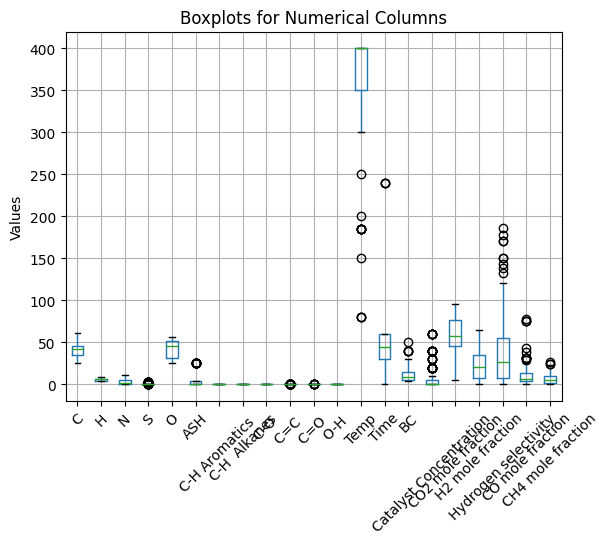

No outliers found in column 'C'
No outliers found in column 'H'
No outliers found in column 'N'
Outliers in column 'S': [0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.3, 0.8, 0.5, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8]
No outliers found in column 'O'
Outliers in column 'ASH': [25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0]
No outliers found in column 'C-H Aromatics '
No outliers found in column 'C-H  Alkanes'
No outliers found in column 'C-O '
Outliers in column 'C=C ': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Outliers in column 'C=O ': [0, 0, 0, 0, 0, 0, 0]
No outliers found in column 'O-H '
Outliers in column 'Temp': [150, 200, 250, 185, 185, 185, 185, 185, 185, 8

In [ ]:
#Importation of neccesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate outliers for each column
outliers_dict = {}

# Create boxplots for specified columns
df[columns_to_check].boxplot()
plt.title("Boxplots for Numerical Columns")
plt.ylabel("Values")
plt.xticks(rotation=45)
plt.show()

# Check for outliers and plot the boxplot
for col in columns_to_check:
   q1 = np.quantile(df[col], 0.25)
   q3 = np.quantile(df[col], 0.75)
   iqr = q3 - q1
   lower_bound = q1 - 1.5 * iqr
   upper_bound = q3 + 1.5 * iqr
   outliers = df[col][(df[col] < lower_bound) | (df[col] > upper_bound)]
   outliers_dict[col] = outliers.tolist()

# Print outliers for each column
for col, outliers in outliers_dict.items():
   if outliers:
       print(f"Outliers in column '{col}': {outliers}")
   else:
       print(f"No outliers found in column '{col}'")


Above, I have written a code to identify outliers within the dataset for further evaluation.  As seen, there are many within this dataset and the next step will be to remove them.

**Remove Outliers**

In [ ]:
# Removal of outliers
df_cleaned = df.copy()
for col in columns_to_check:
   df_cleaned = df_cleaned[~df_cleaned[col].isin(outliers_dict[col])]

# Check to make sure that the outliers were removed
for col in columns_to_check:
   if any(outlier in df_cleaned[col].values for outlier in outliers_dict[col]):
       print(f"Outlier(s) from column '{col}' were not removed.")
   else:
       print(f"All outliers were successfully removed from column '{col}'.")


All outliers were successfully removed from column 'C'.
All outliers were successfully removed from column 'H'.
All outliers were successfully removed from column 'N'.
All outliers were successfully removed from column 'S'.
All outliers were successfully removed from column 'O'.
All outliers were successfully removed from column 'ASH'.
All outliers were successfully removed from column 'C-H Aromatics '.
All outliers were successfully removed from column 'C-H  Alkanes'.
All outliers were successfully removed from column 'C-O '.
All outliers were successfully removed from column 'C=C '.
All outliers were successfully removed from column 'C=O '.
All outliers were successfully removed from column 'O-H '.
All outliers were successfully removed from column 'Temp'.
All outliers were successfully removed from column 'Time'.
All outliers were successfully removed from column 'BC'.
All outliers were successfully removed from column 'Catalyst Concentration'.
All outliers were successfully removed

Since outliers were now removed from the dataset, we can begin evaluating the data further.  A very simple removal of data code was implemented along with a check that that said data was removed.

In [ ]:
# Display the first few rows of the original dataset
print("Original DataFrame:")
print(df_cleaned.head())

# Display the first few rows of the cleaned dataset
print("\nCleaned DataFrame:")
print(df_cleaned.head())

# Apply one-hot encoding
df_encoded = pd.get_dummies(df_cleaned, columns=categorical_cols, prefix_sep='_')

# Display the first few rows of the encoded DataFrame
print("\nEncoded DataFrame:")
print(df_encoded.head())

Original DataFrame:
             feed Type of Feed      C     H    N    S      O   ASH  \
26  Plastic Waste          PET  60.82  4.22  0.0  0.0  31.24  3.72   
27  Plastic Waste          PET  60.82  4.22  0.0  0.0  31.24  3.72   
28  Plastic Waste          PET  60.82  4.22  0.0  0.0  31.24  3.72   
29  Plastic Waste          PET  60.82  4.22  0.0  0.0  31.24  3.72   
30  Plastic Waste          PET  60.82  4.22  0.0  0.0  31.24  3.72   

    C-H Aromatics   C-H  Alkanes  ...  Time   BC  Reactor  Catalyst Type  \
26               1             1  ...    30  5.0    Batch              0   
27               1             1  ...    45  5.0    Batch              0   
28               1             1  ...    60  5.0    Batch              0   
29               1             1  ...    30  5.0    Batch              0   
30               1             1  ...    45  5.0    Batch              0   

    Catalyst Concentration  CO2 mole fraction  H2 mole fraction  \
26                     0.0         

Above I applied one hot-encoding to allow for better and more efficient predictive models from the data, however, the removal of outliers was neccesary before to ensure that the predicitive modelling is accurate.
I also deisplayed the before, cleaned, and one0hot encoded data in this line so the progression is seen.

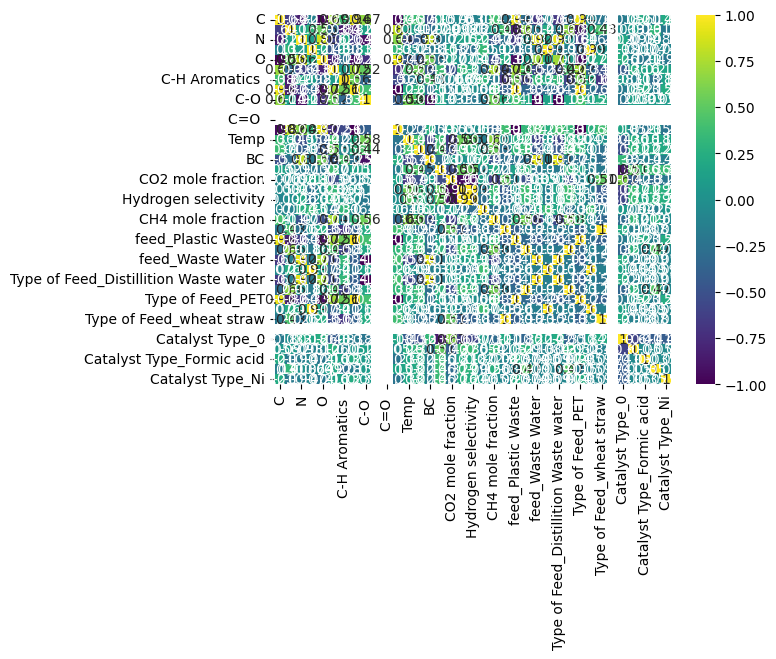

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df_encoded.corr()

# Visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap="viridis")
plt.show()

In my opinion, all of the data within the dataset now is neccesary and can be used to the advantage of the user to further explain issues within the code.  I will not be removing any data as the correlation analsysis shows that this data is highly useful.  Further more, no redundant variables will be removed either for the same reason.


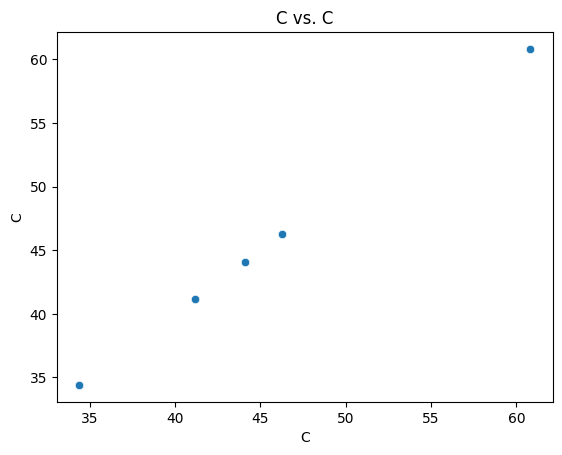

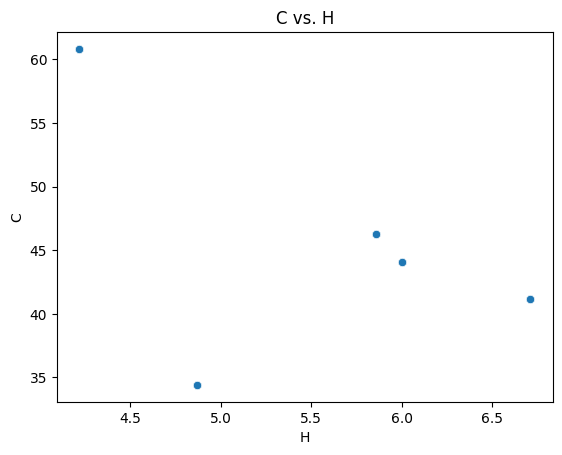

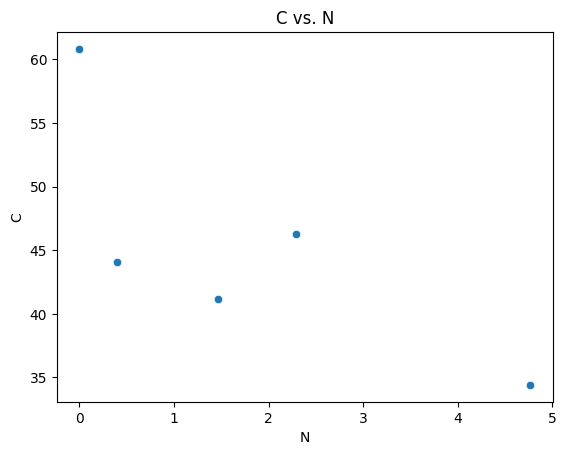

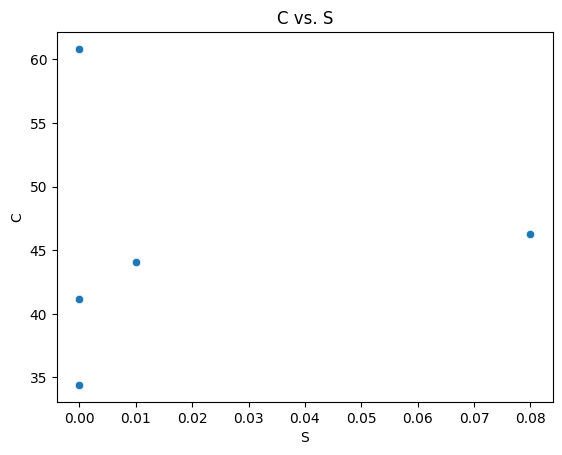

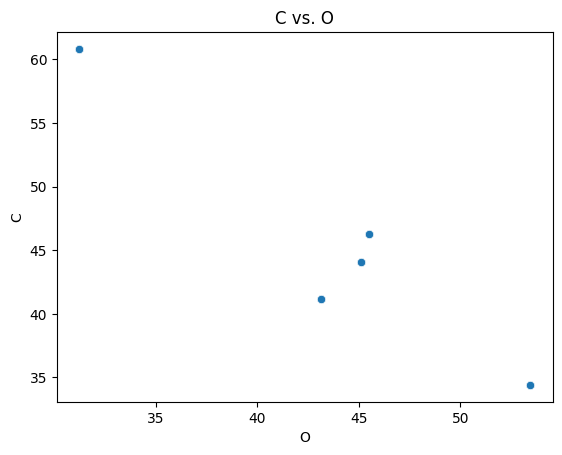

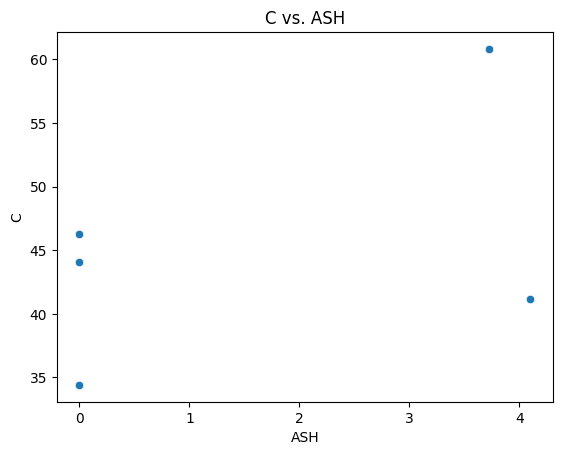

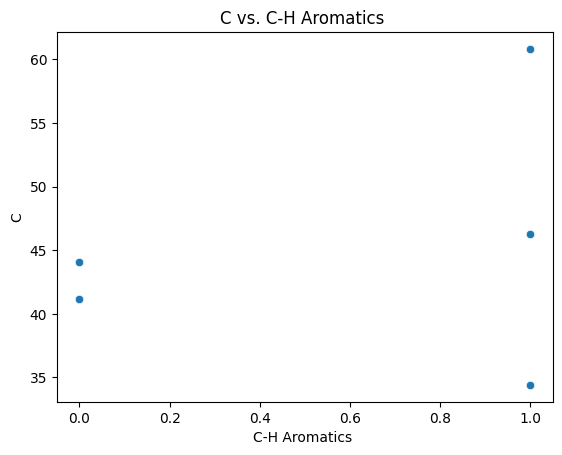

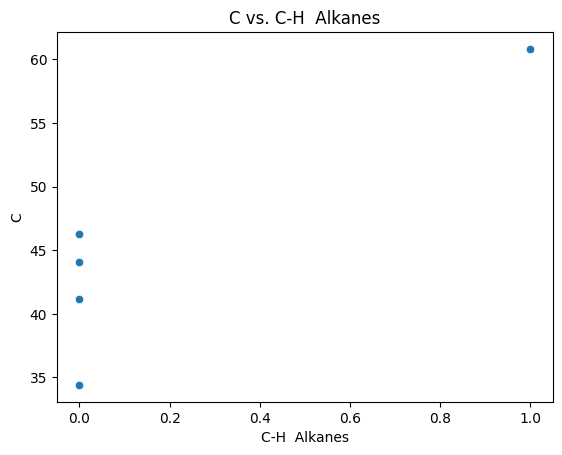

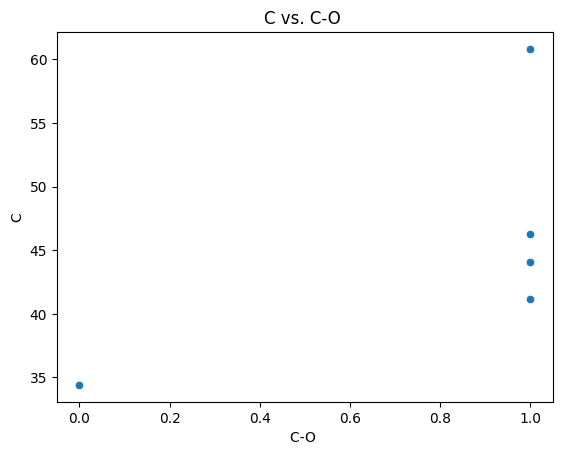

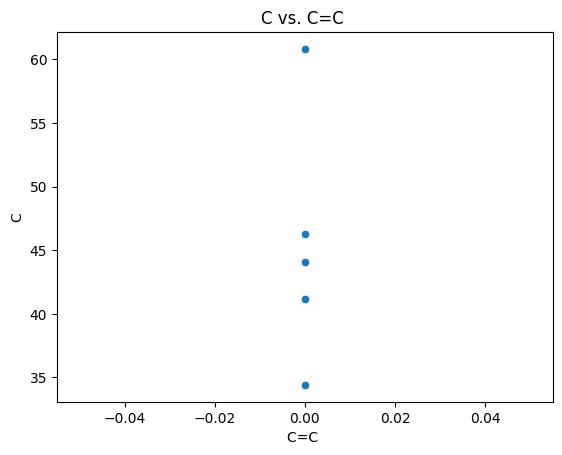

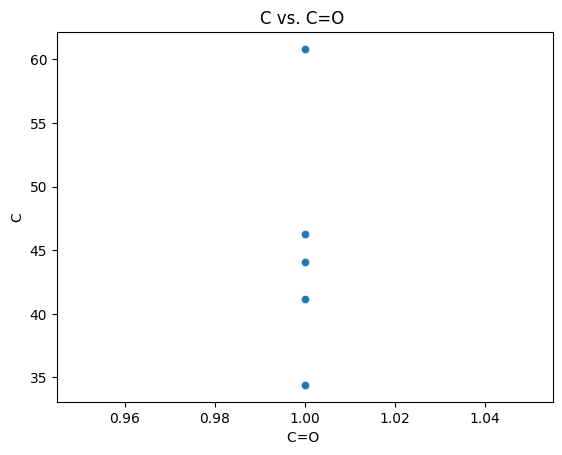

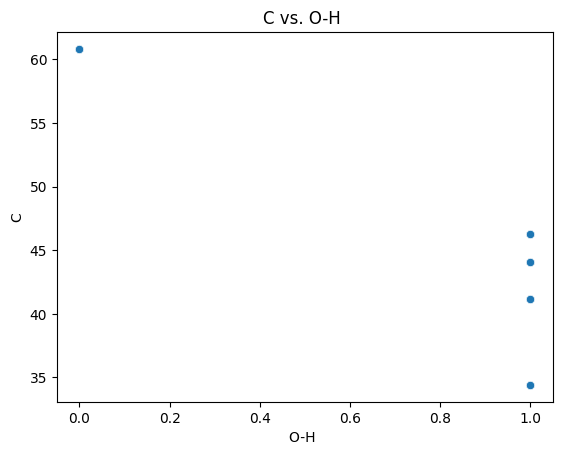

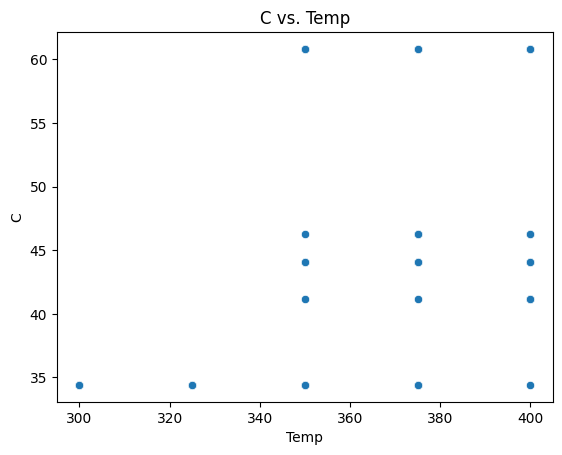

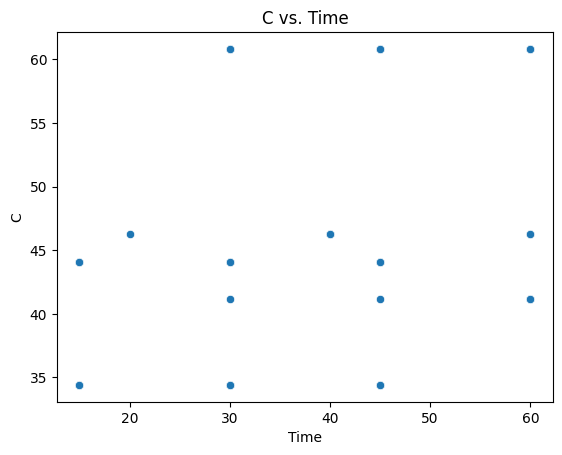

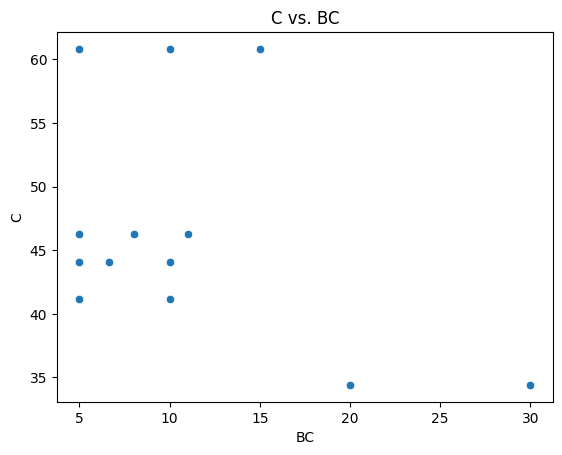

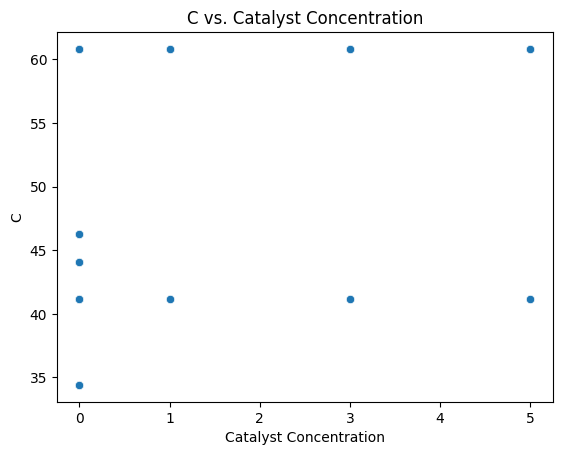

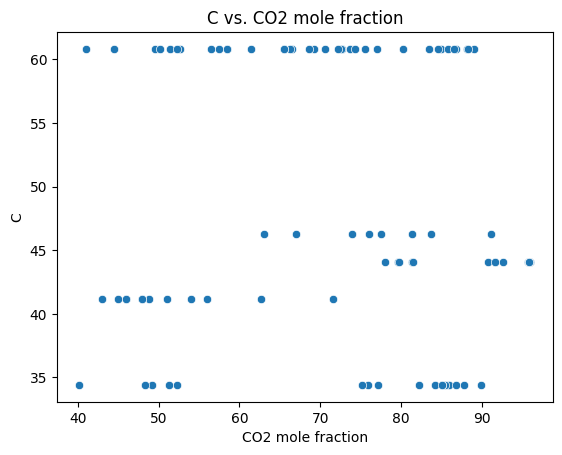

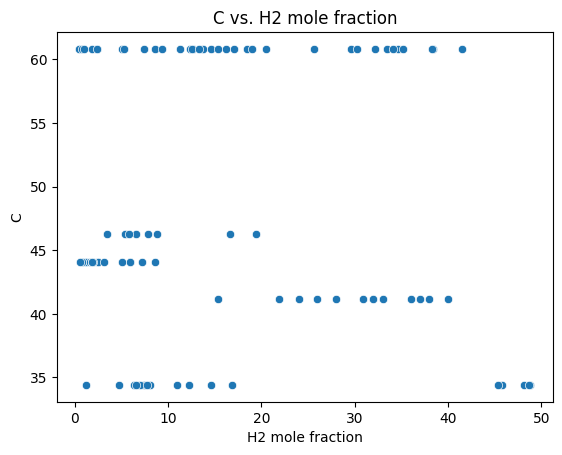

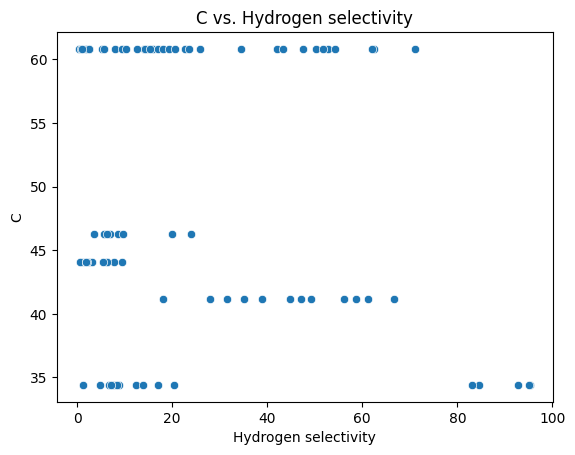

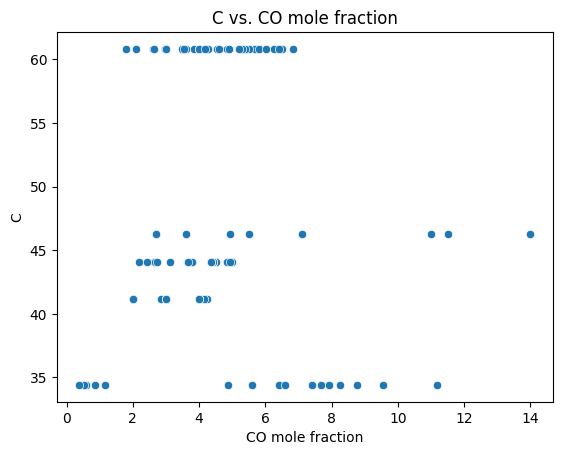

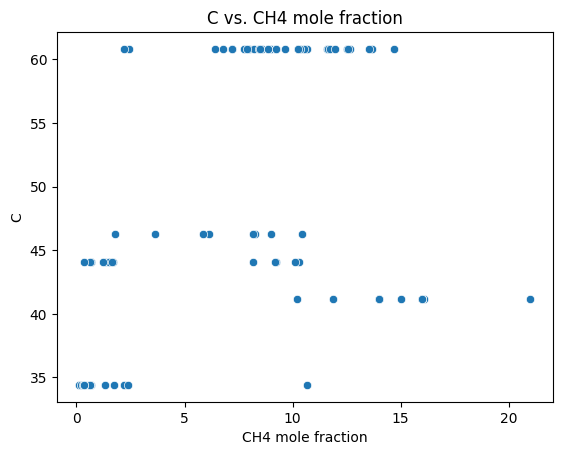

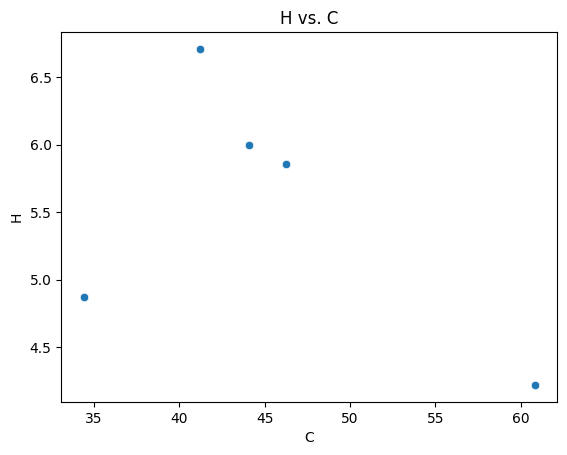

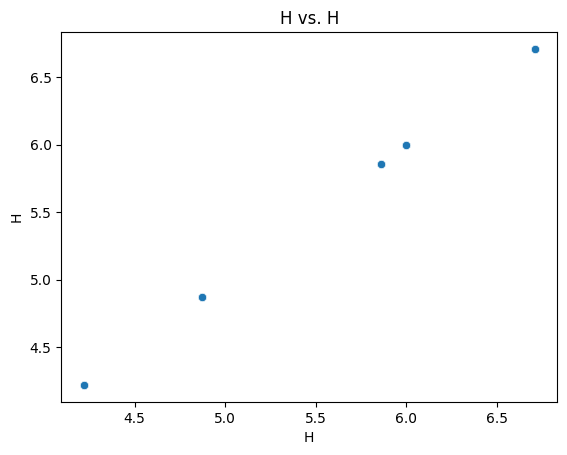

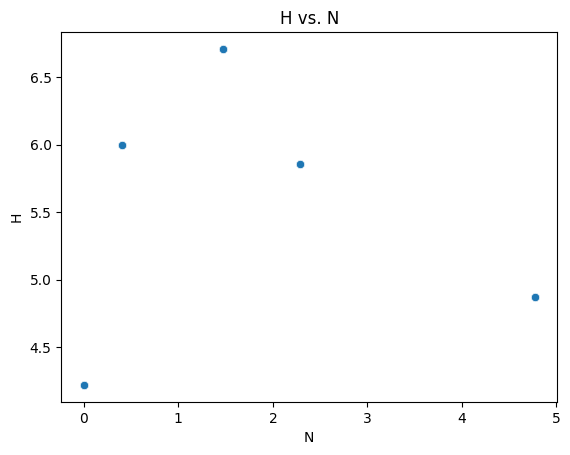

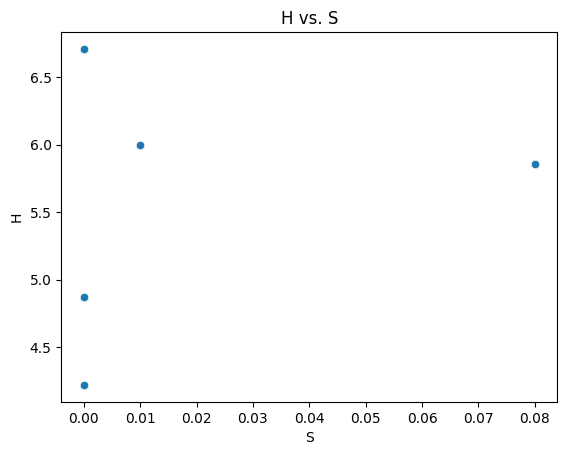

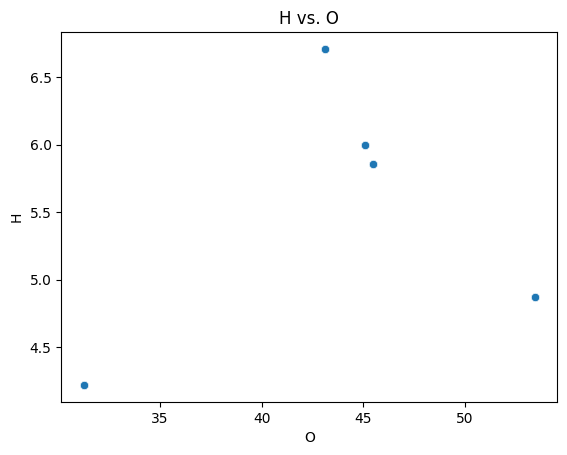

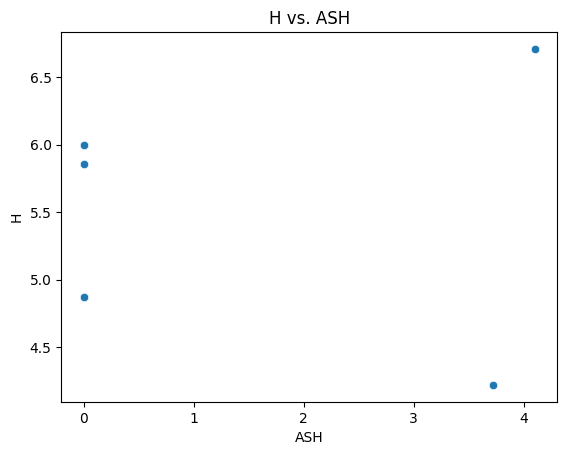

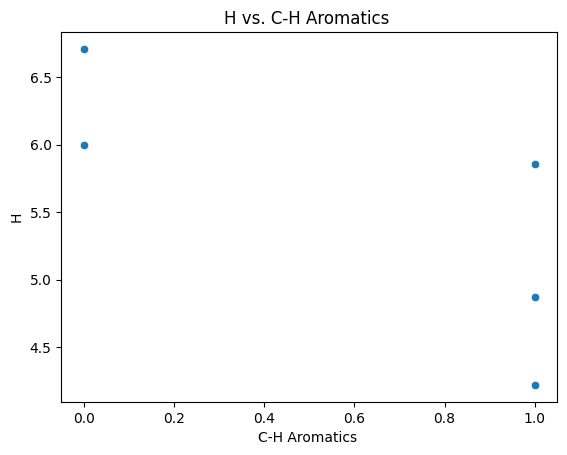

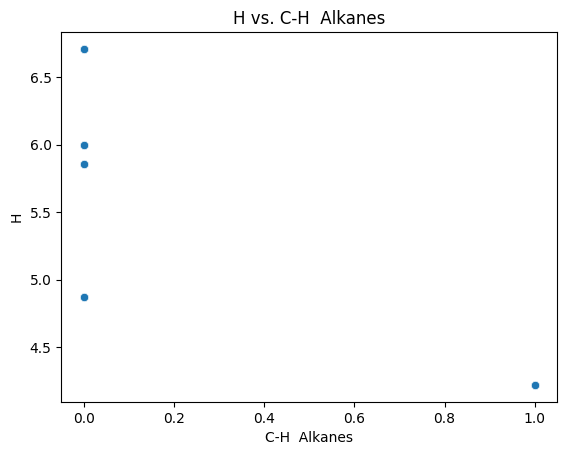

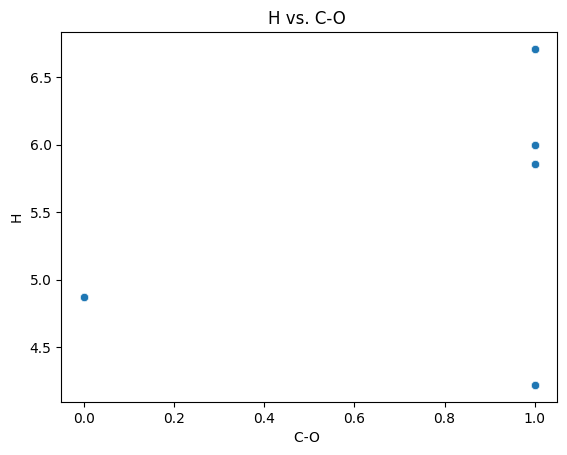

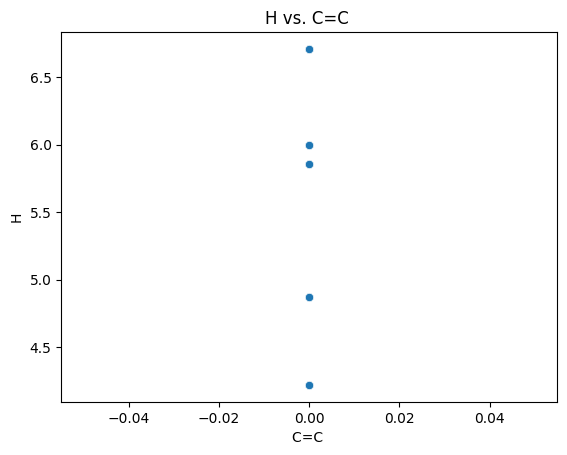

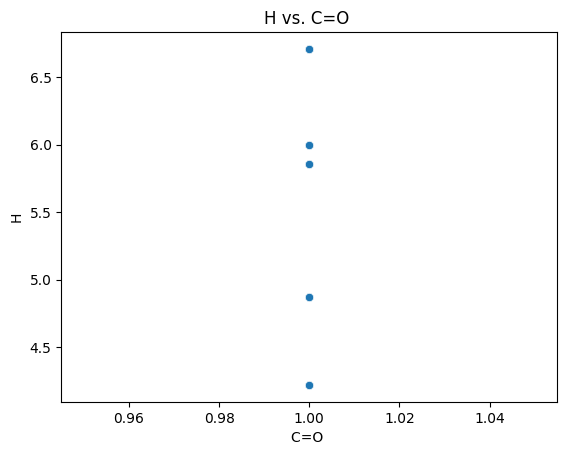

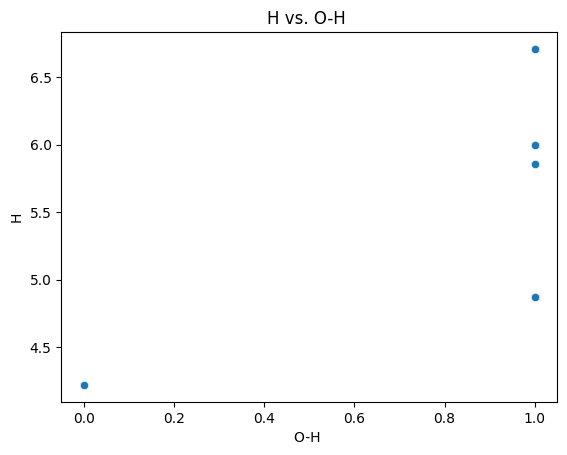

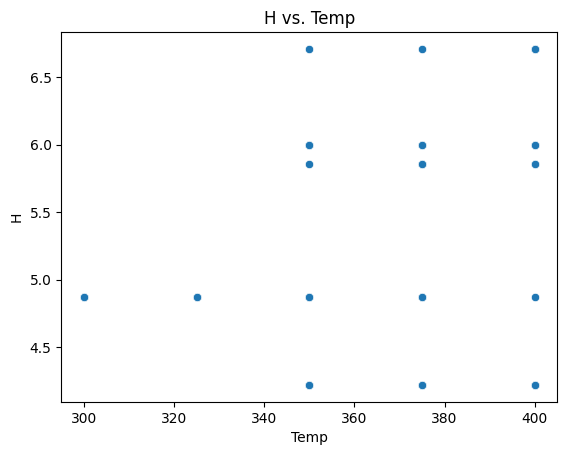

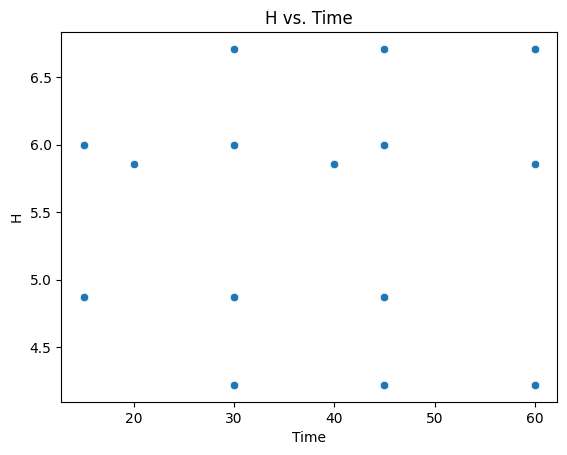

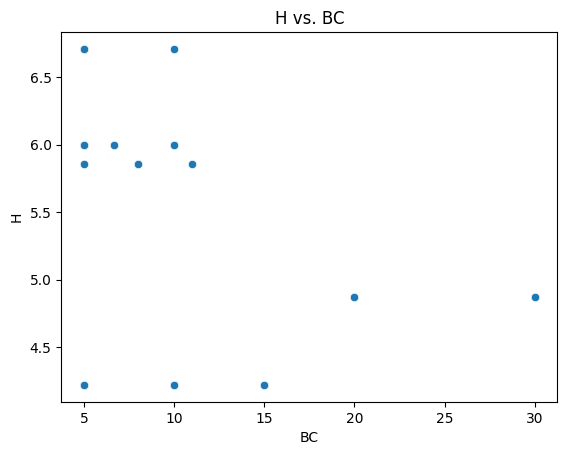

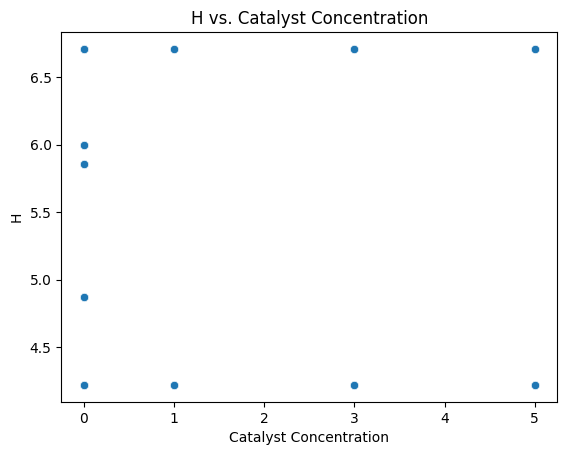

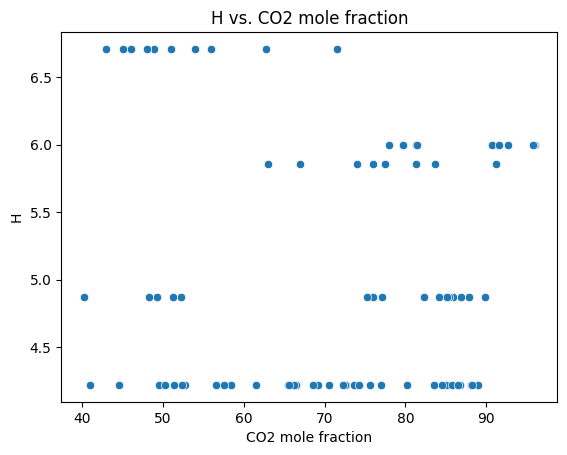

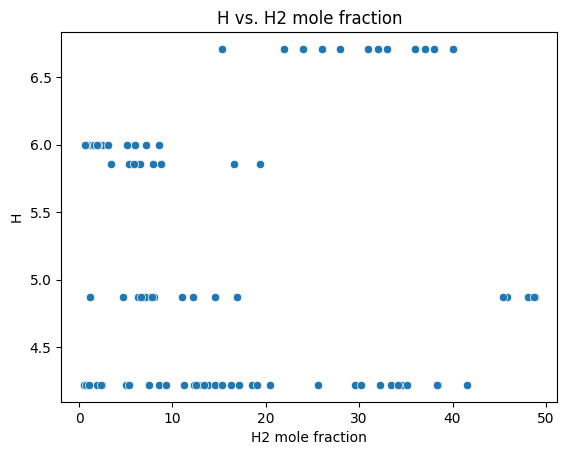

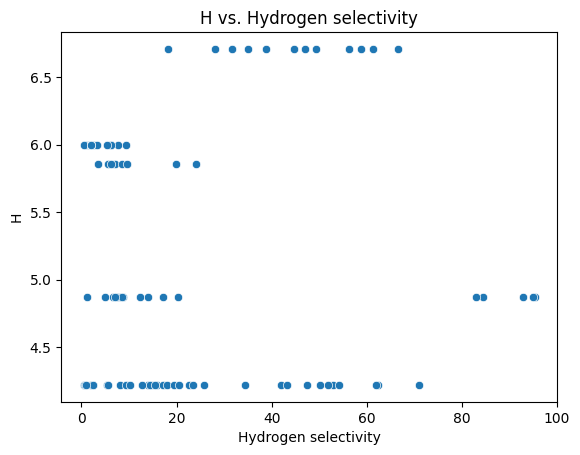

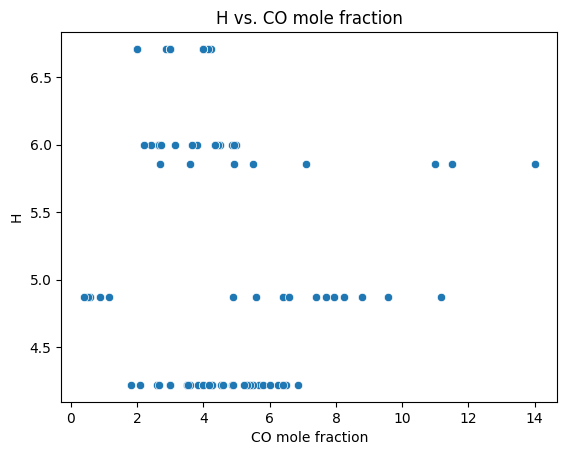

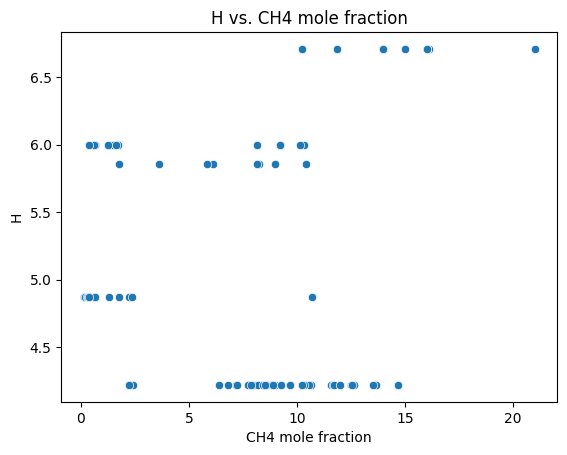

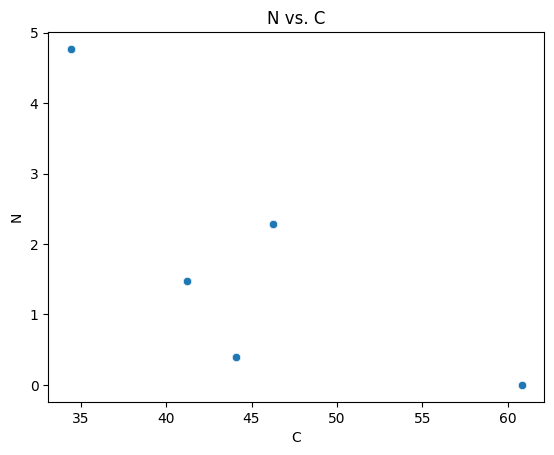

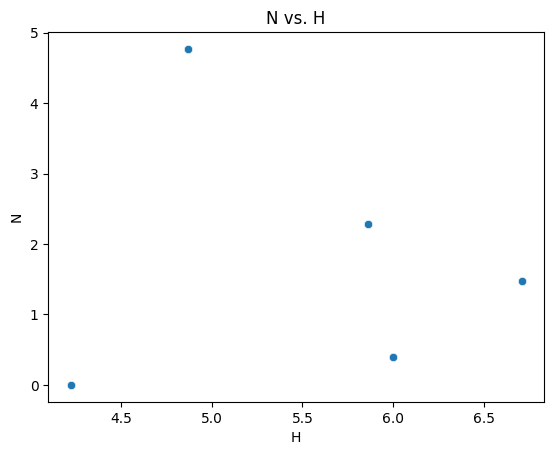

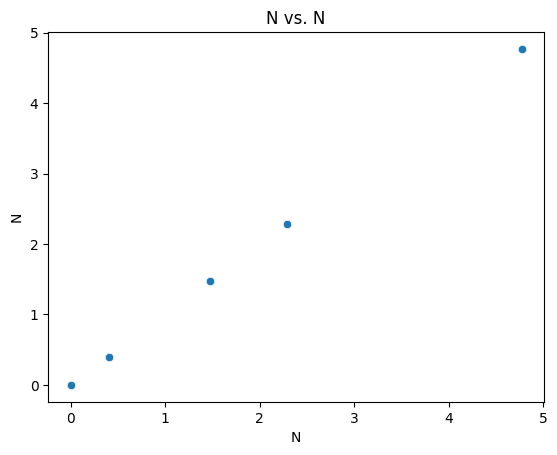

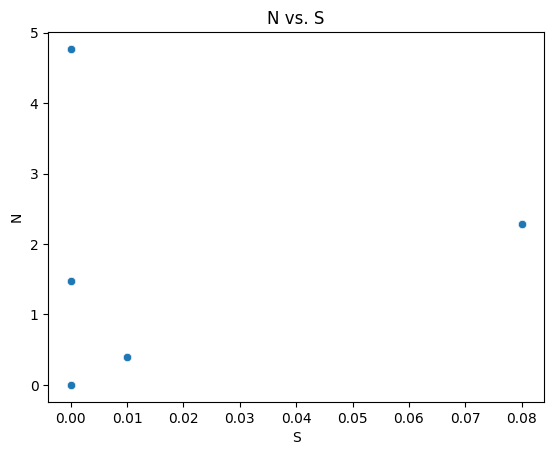

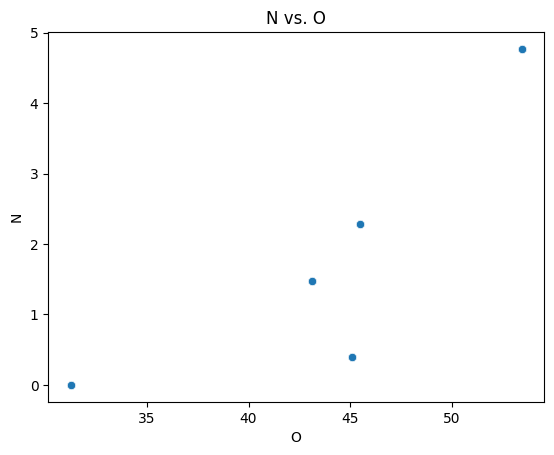

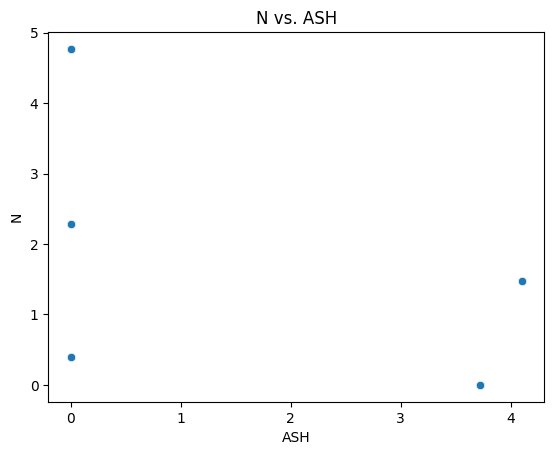

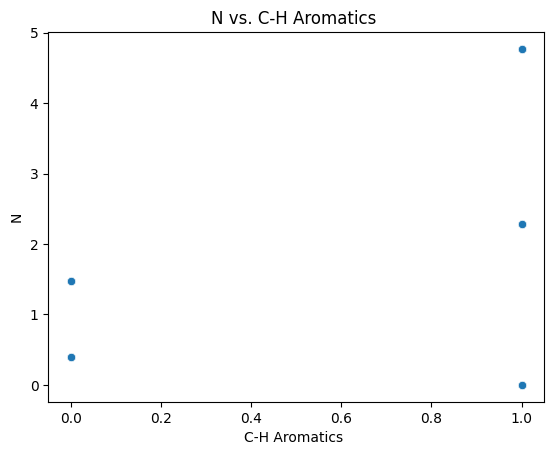

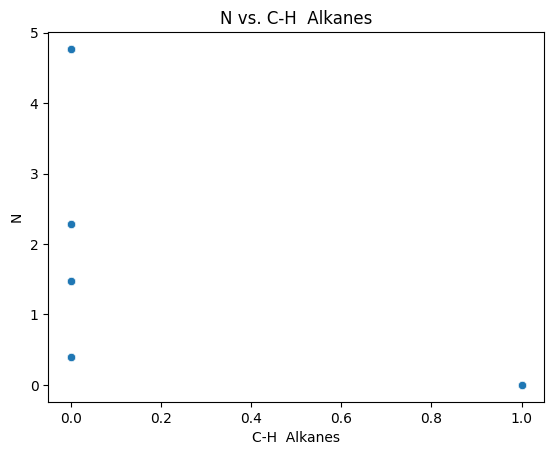

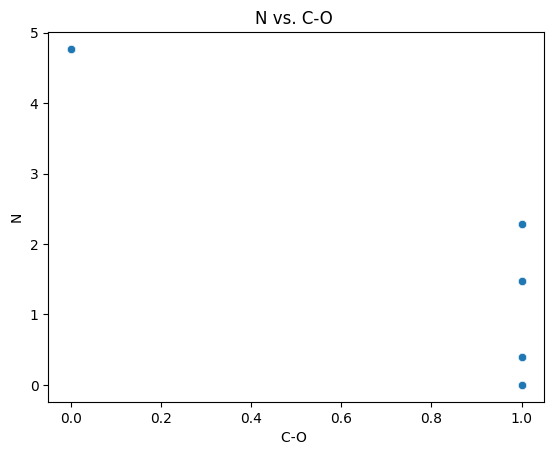

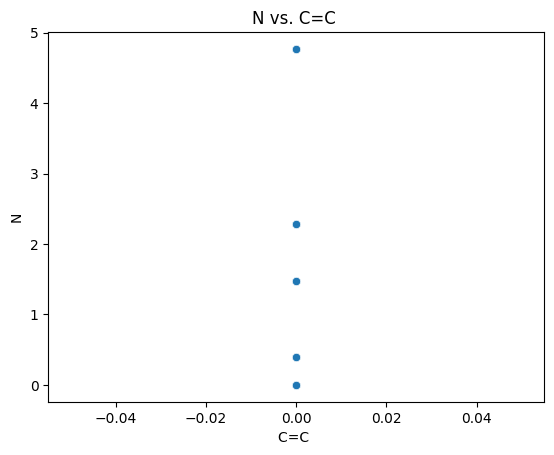

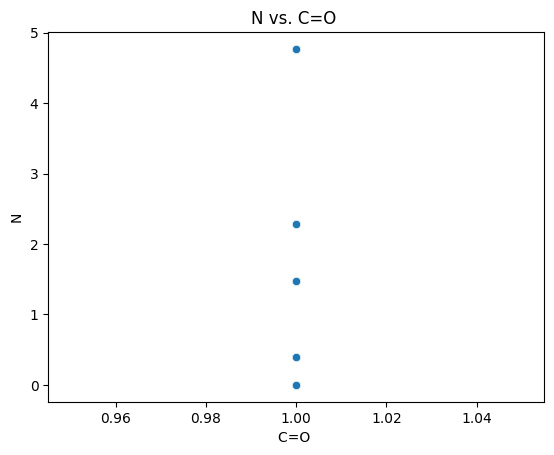

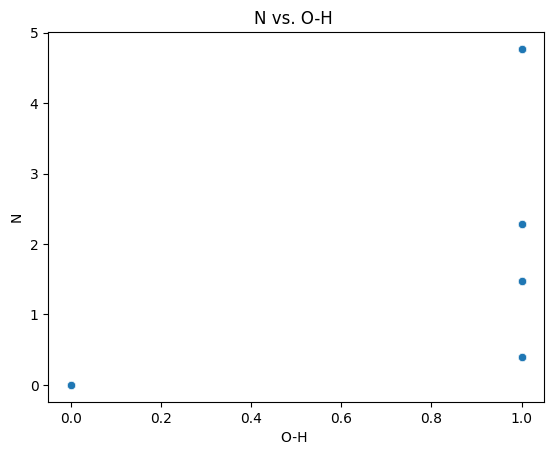

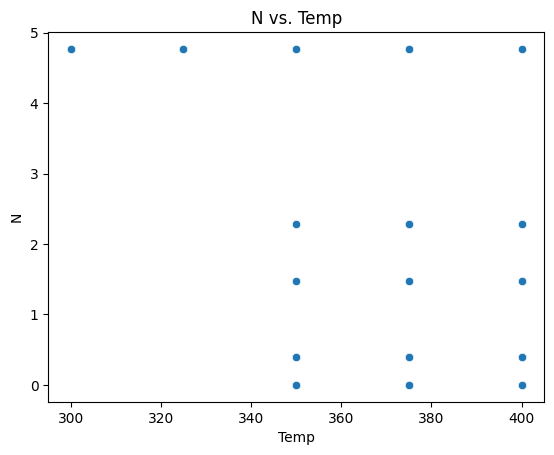

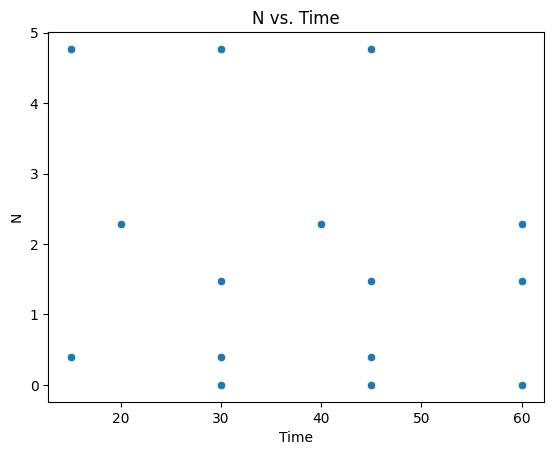

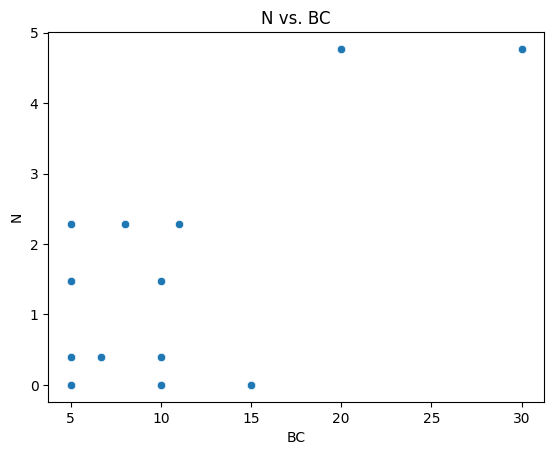

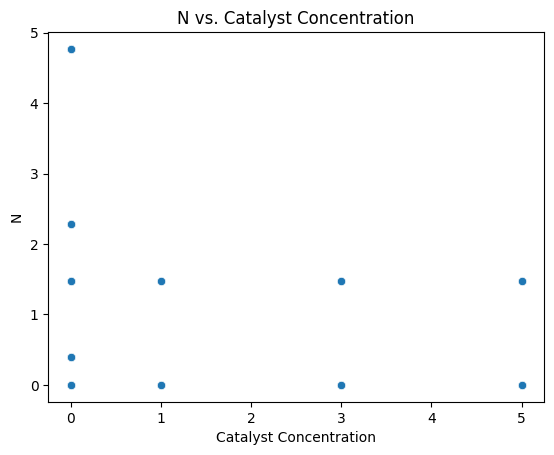

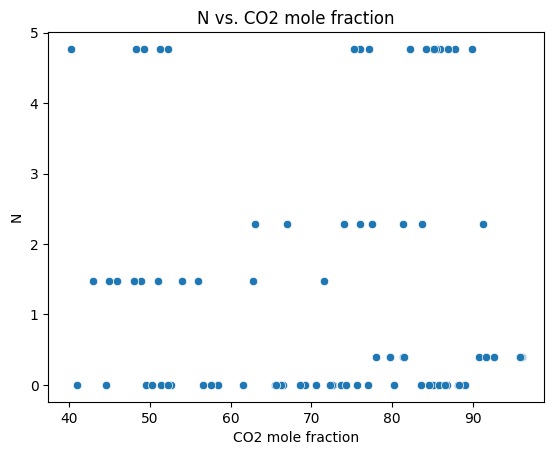

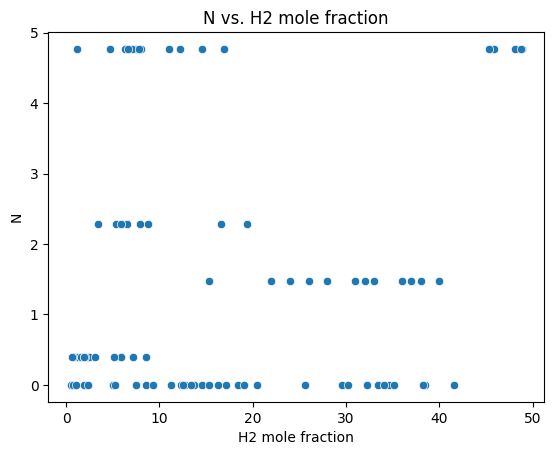

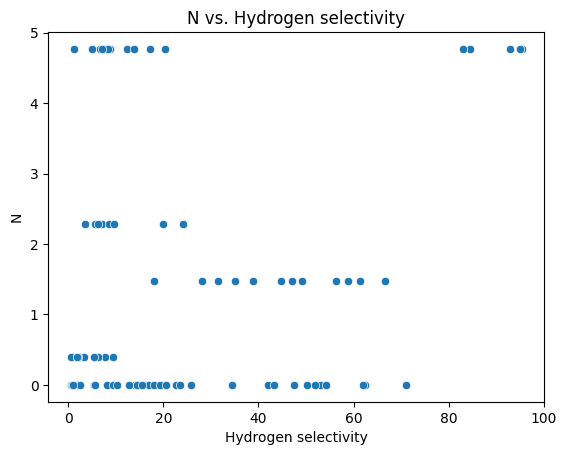

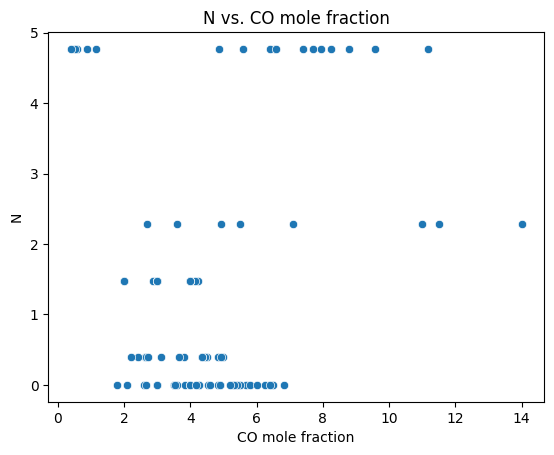

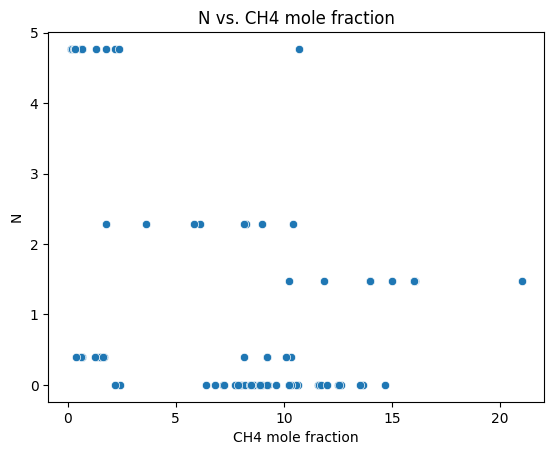

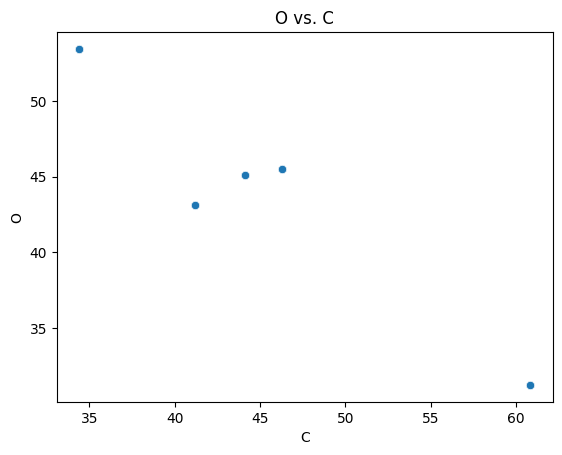

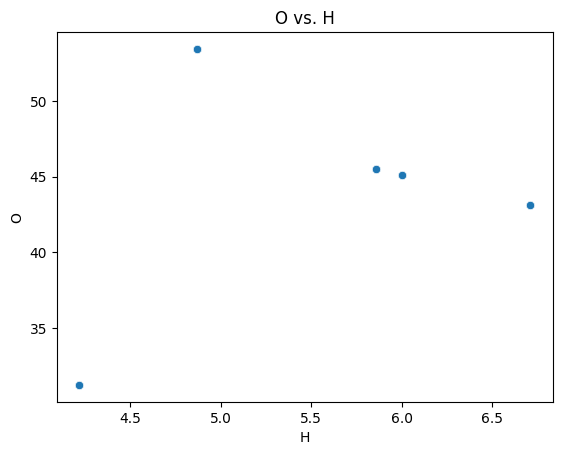

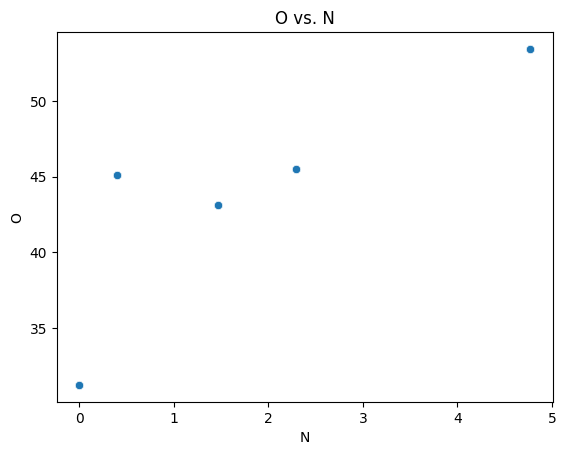

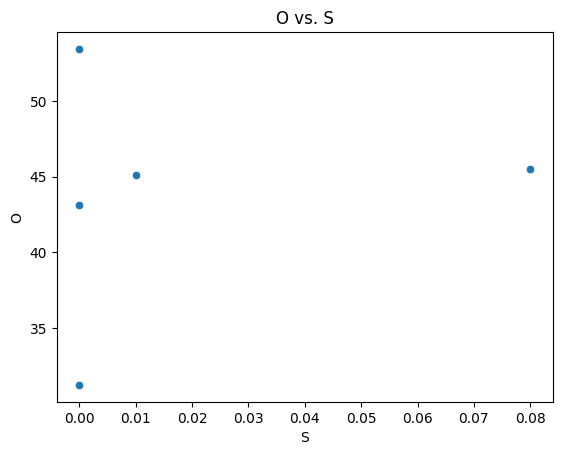

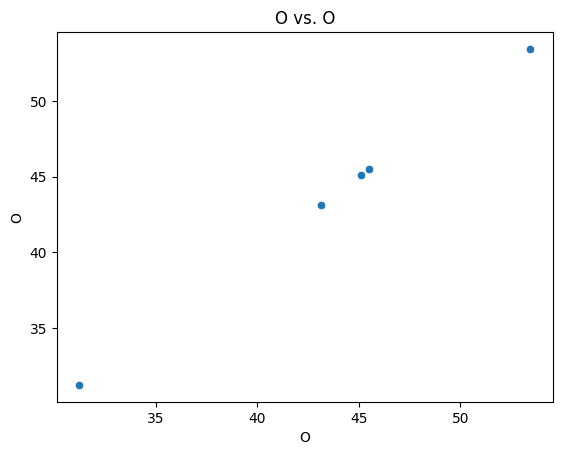

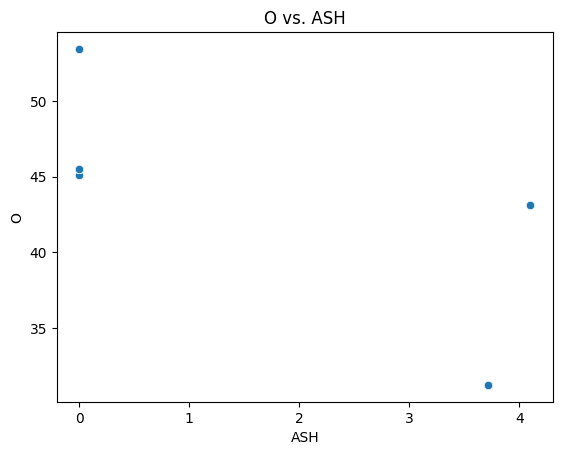

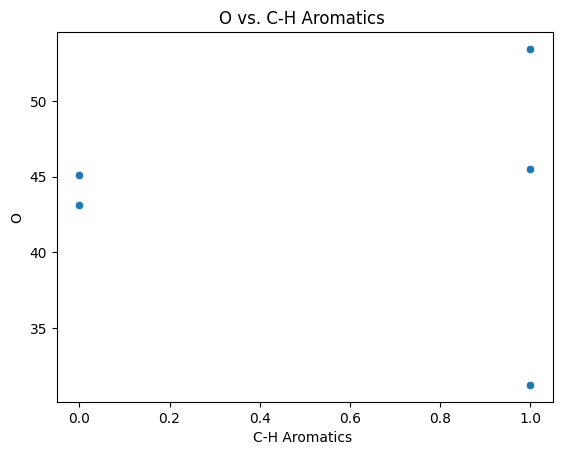

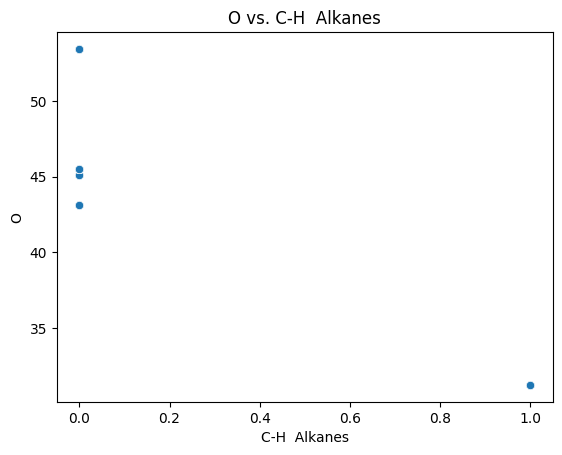

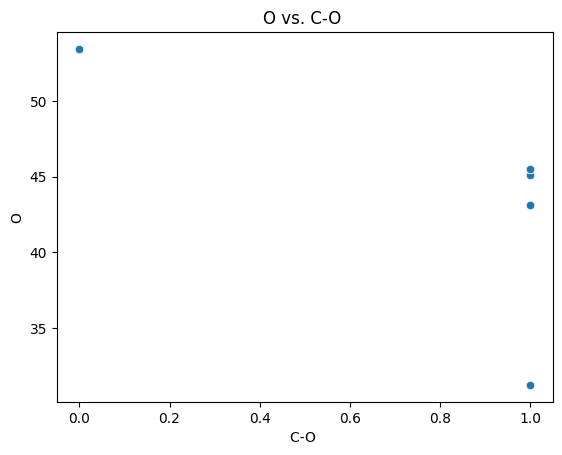

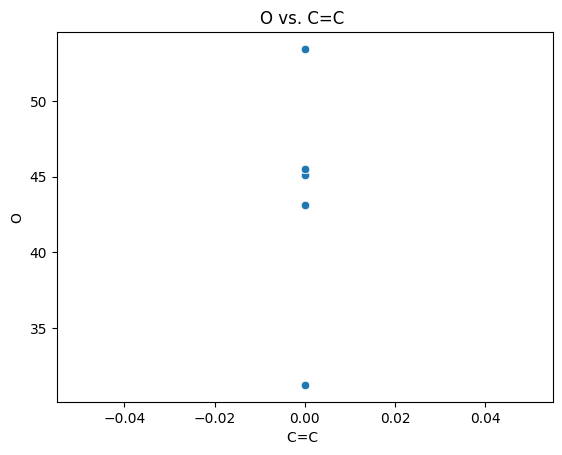

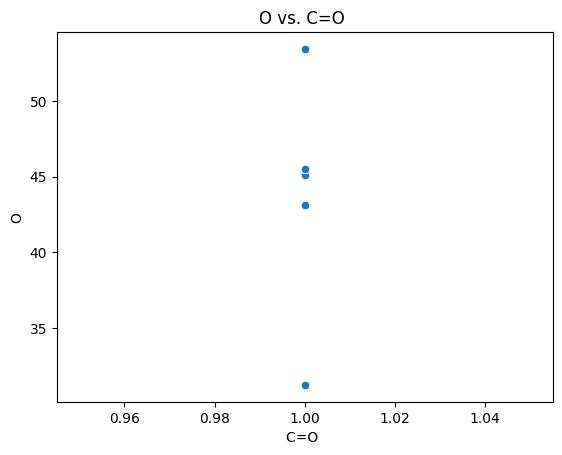

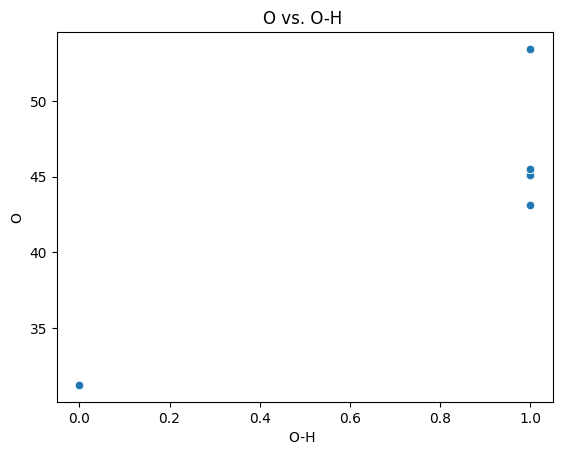

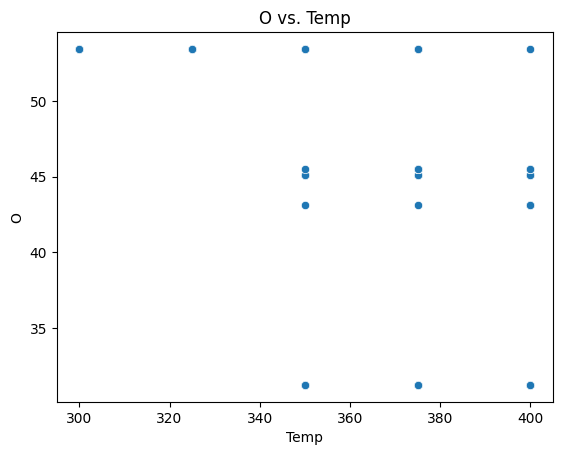

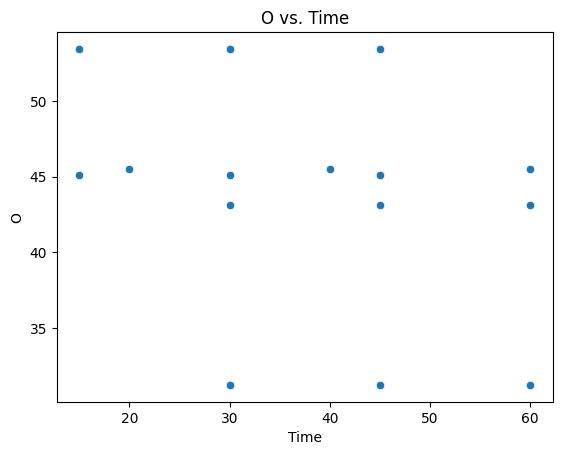

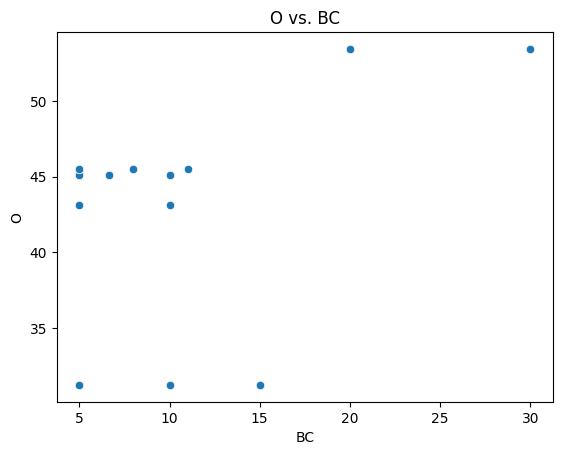

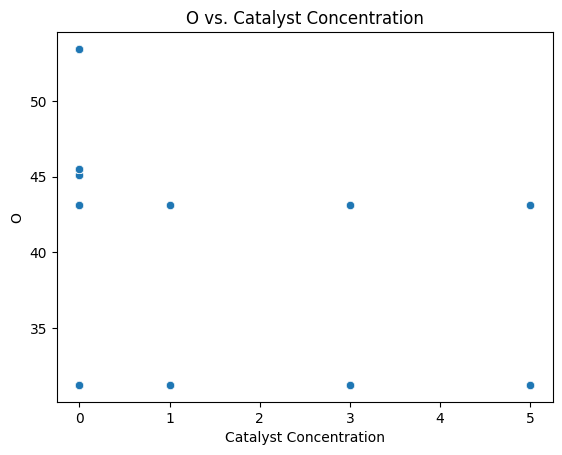

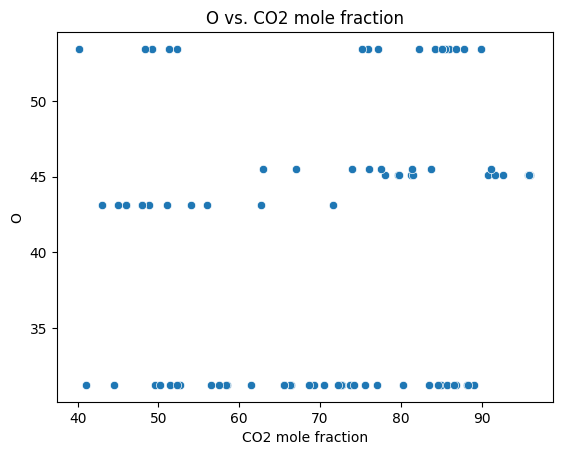

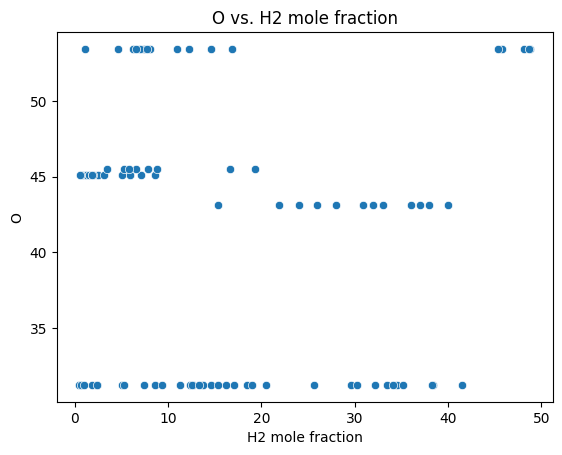

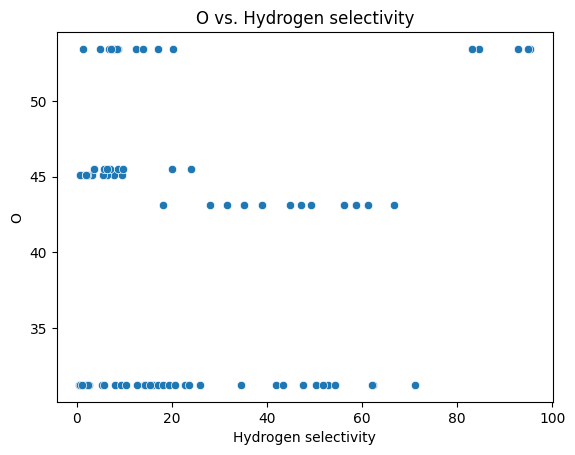

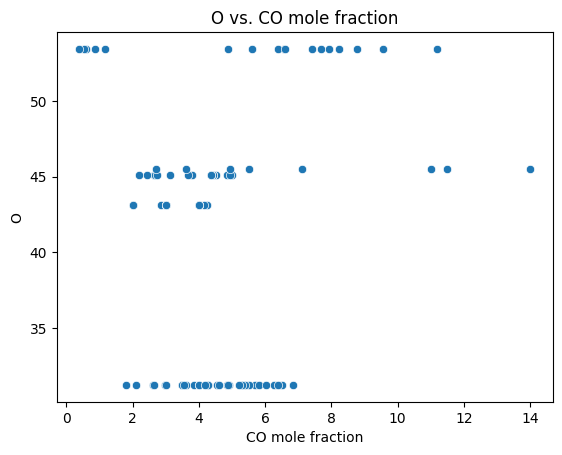

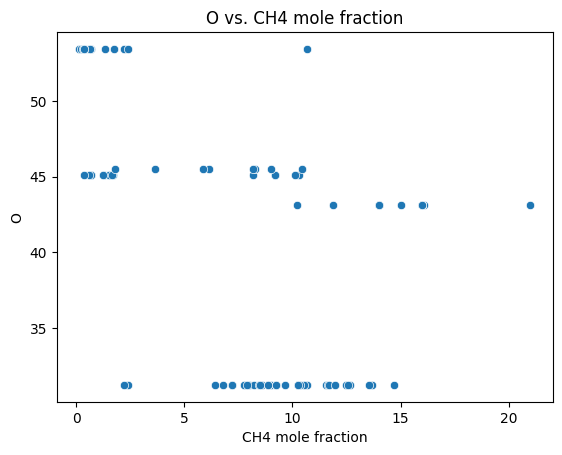

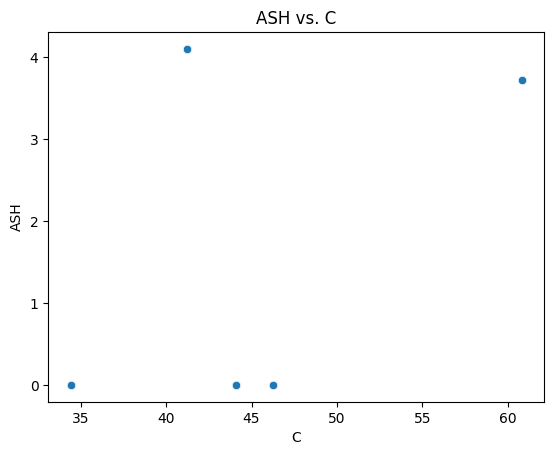

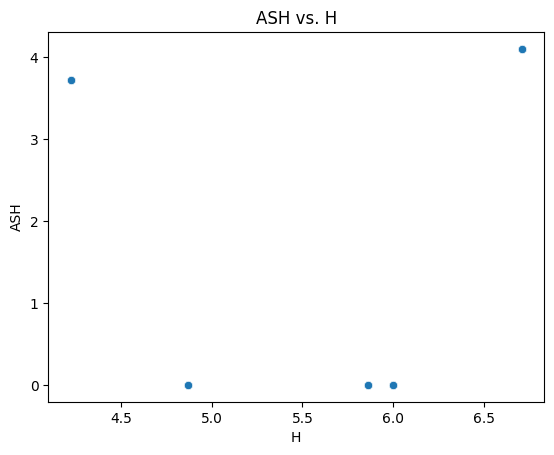

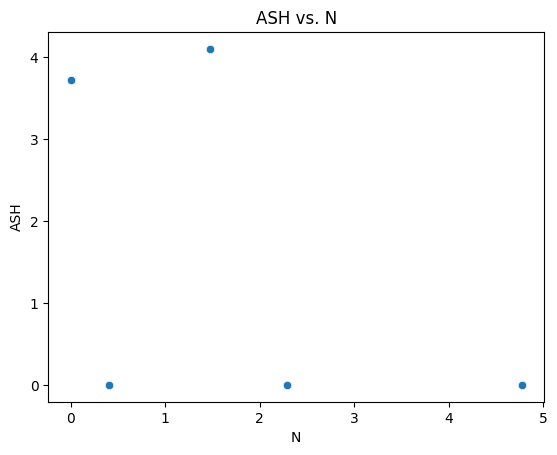

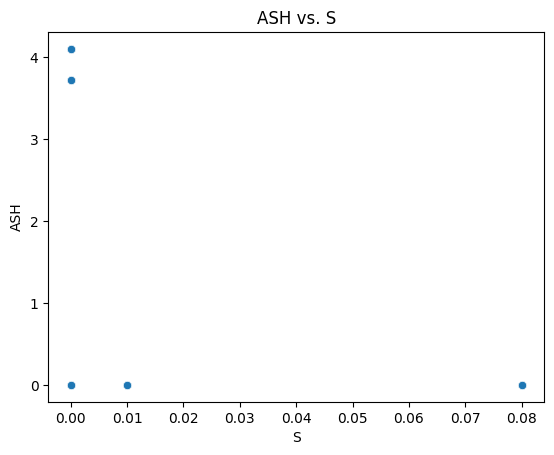

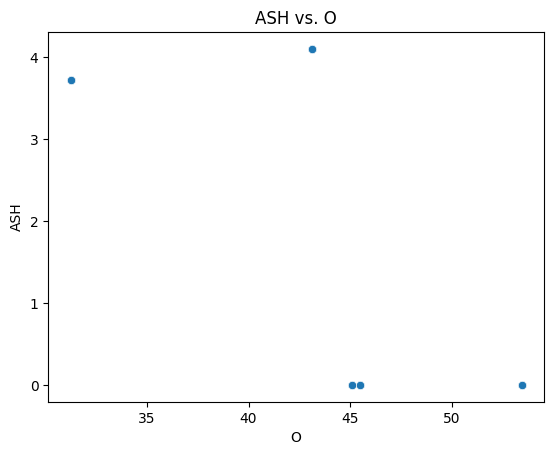

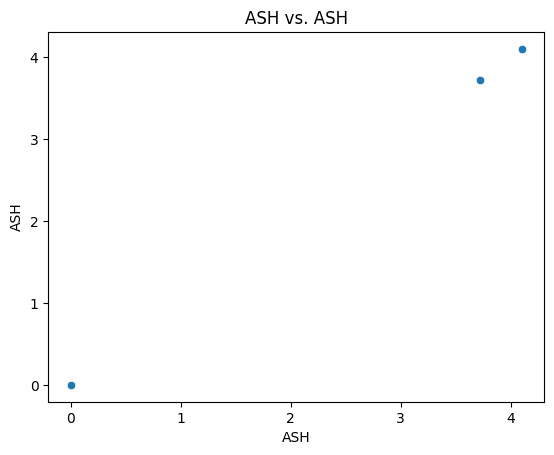

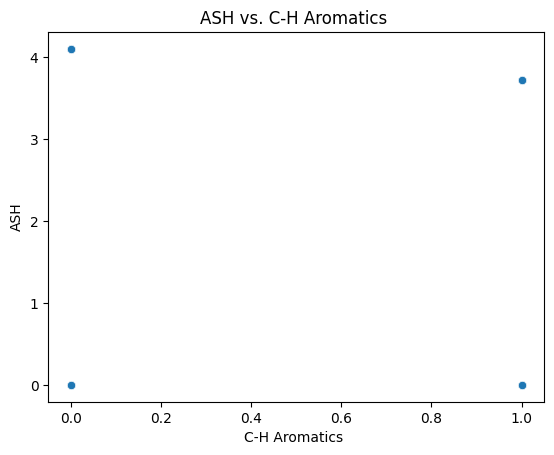

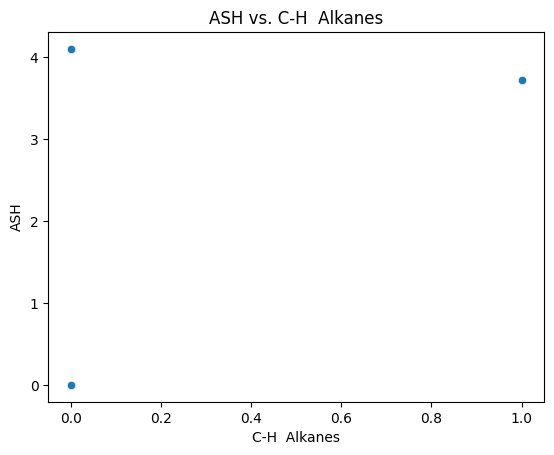

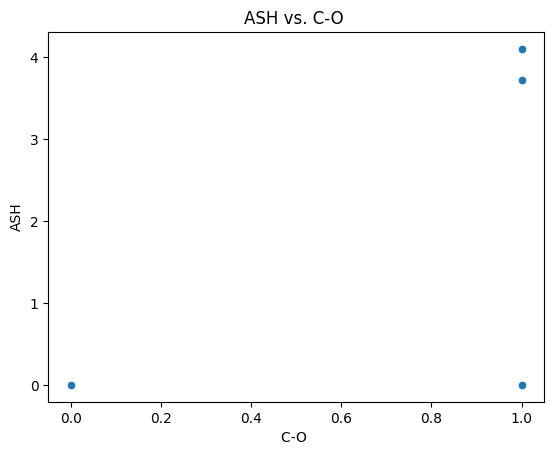

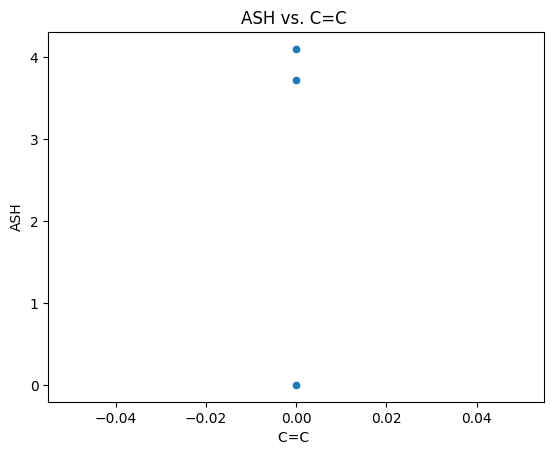

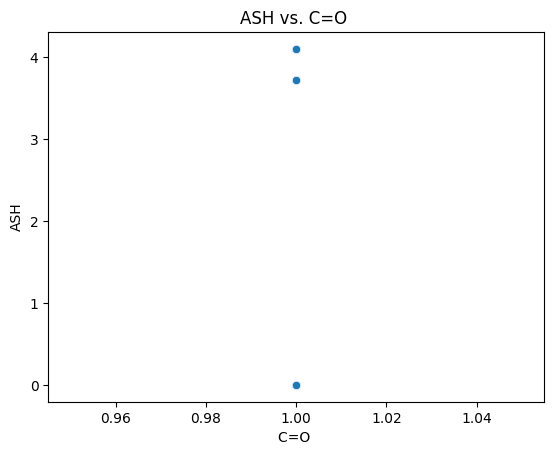

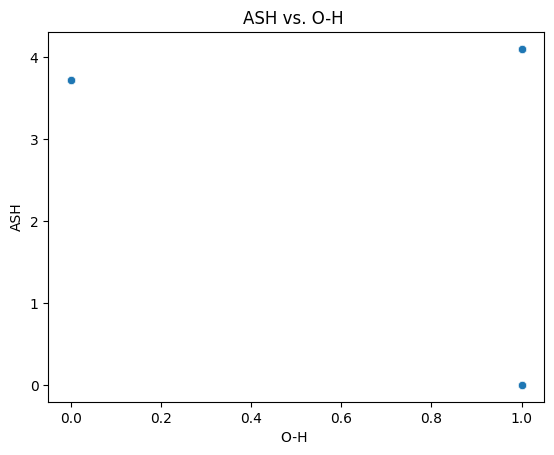

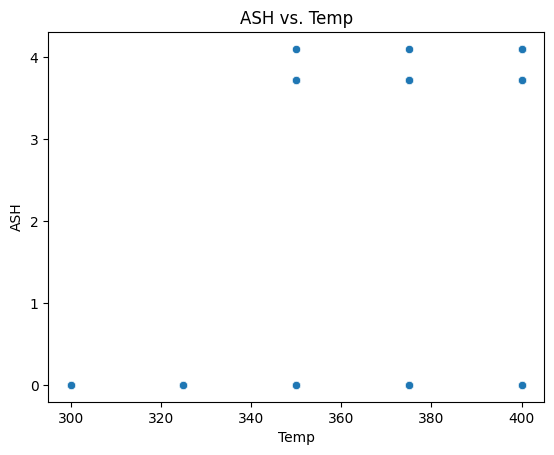

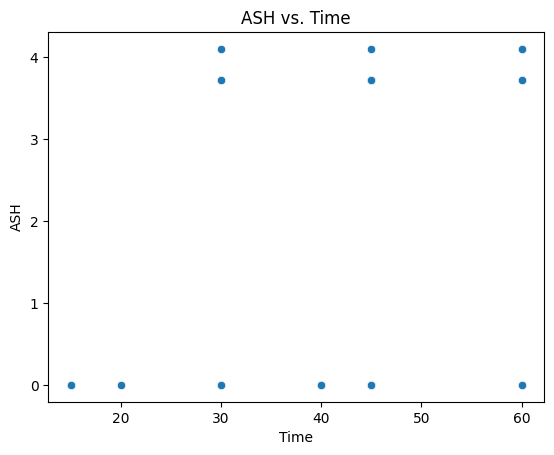

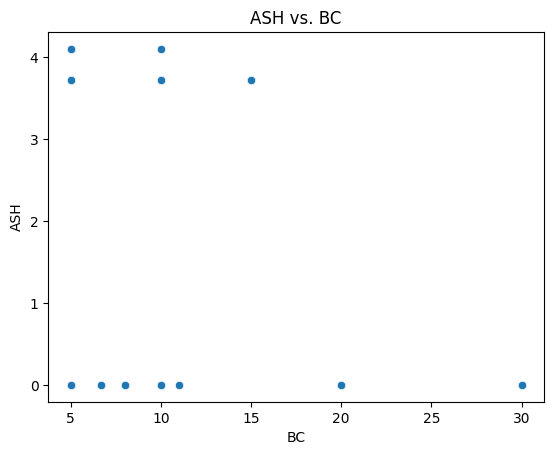

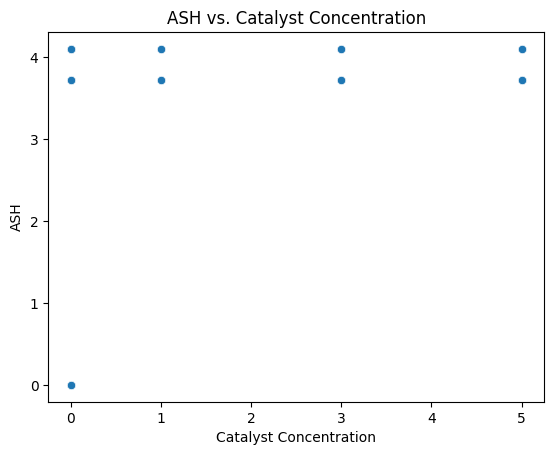

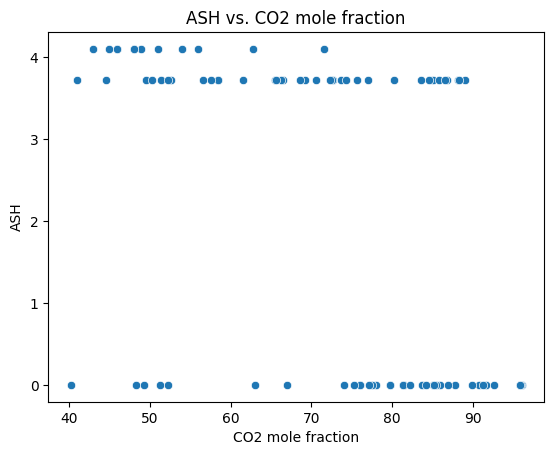

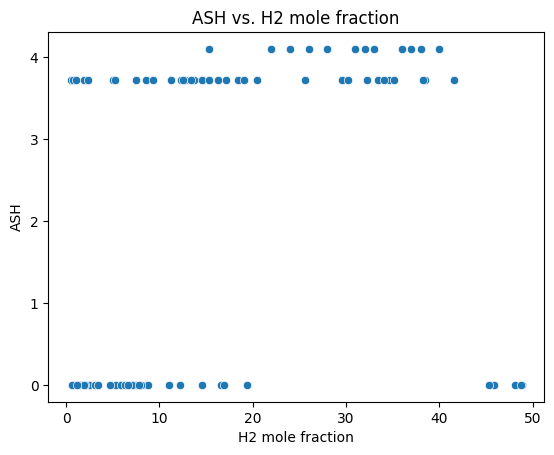

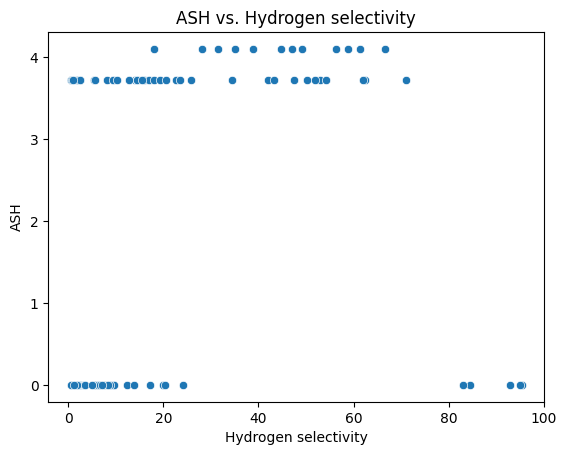

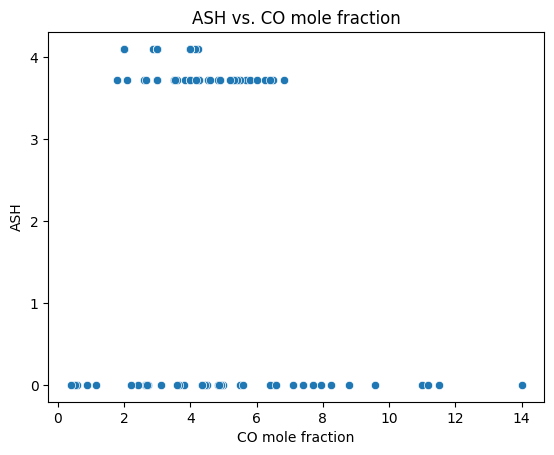

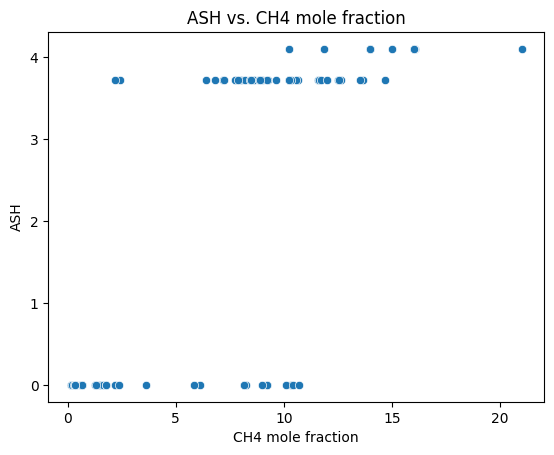

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plots for continuous variables to compare relationships to the target
for variable in numeric_cols:
  sns.scatterplot(x=variable, y='C', data=df_cleaned)
  plt.title(f'C vs. {variable}')
  plt.show()

for variable in numeric_cols:
  sns.scatterplot(x=variable, y='H', data=df_cleaned)
  plt.title(f'H vs. {variable}')
  plt.show()

for variable in numeric_cols:
  sns.scatterplot(x=variable, y='N', data=df_cleaned)
  plt.title(f'N vs. {variable}')
  plt.show()

for variable in numeric_cols:
  sns.scatterplot(x=variable, y='O', data=df_cleaned)
  plt.title(f'O vs. {variable}')
  plt.show()

for variable in numeric_cols:
  sns.scatterplot(x=variable, y='ASH', data=df_cleaned)
  plt.title(f'ASH vs. {variable}')
  plt.show()


Above there are clearly some plots and variables plotted against the target variables that make more sense for correlation analysis but I chose a scatter plot as it makes it very easy to identify relationships with some variables better.

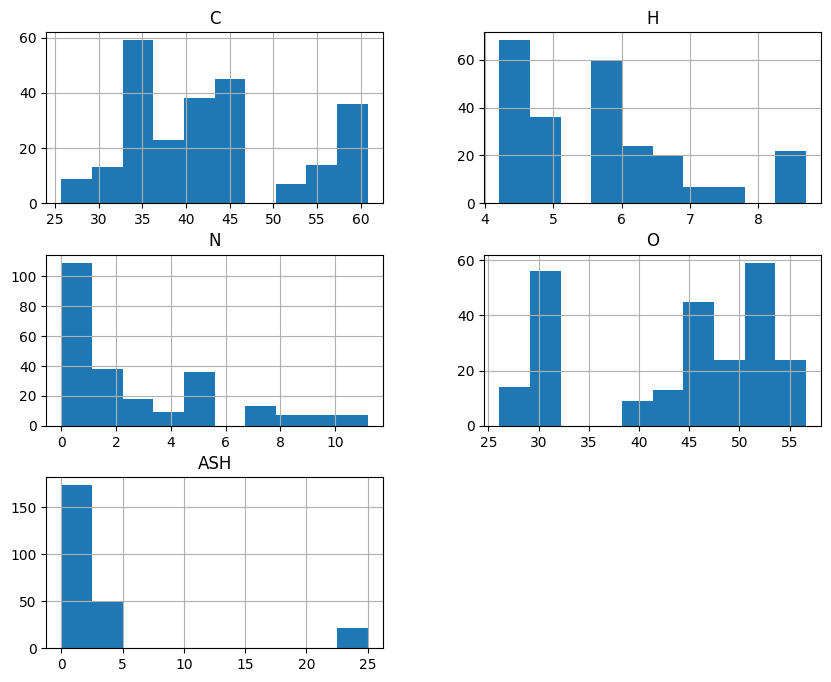

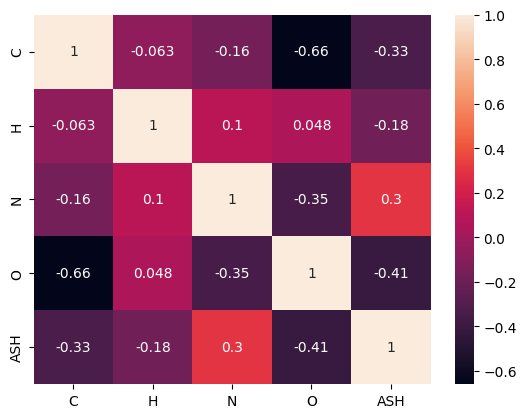

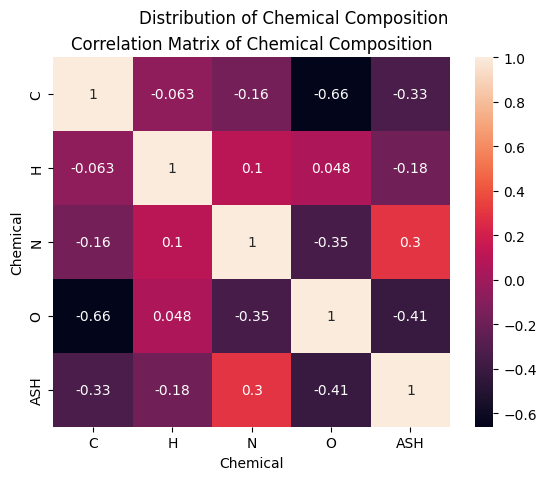

In [ ]:
# Visualization (e.g., histograms)
df[['C', 'H', 'N', 'O', 'ASH']].hist(figsize=(10, 8))
plt.show()

# Correlation analysis (if applicable)
correlation_matrix = df[['C', 'H', 'N', 'O', 'ASH']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()
# Add title and labels
plt.suptitle('Distribution of Chemical Composition')  # Set the overall title
plt.xlabel('Value')
plt.ylabel('Frequency')


# Correlation analysis (if applicable)
correlation_matrix = df[['C', 'H', 'N', 'O', 'ASH']].corr()
sns.heatmap(correlation_matrix, annot=True)

# Add title and labels for the heatmap
plt.title('Correlation Matrix of Chemical Composition')
plt.xlabel('Chemical')
plt.ylabel('Chemical')
plt.show()

I found that these elements above might be targest for important relationships within the dataset and will now base my future data anaylsis off of them, that is why I printed histograms of the data and why a more centered correlation matrix is above.

In [ ]:
# Create a scatter plot
sns.scatterplot(x='feed_PLastic Waste', y='feed_Waste Water', data=df_encoded)

# Set the plot title and labels
plt.title('Relationship Between feed_PLastic Waste and feed_Waste Water')
plt.xlabel('feed_PLastic Waste')
plt.ylabel('feed_Waste Water')

# Create a scatter plot
sns.scatterplot(x='Type of Feed_PET', y='Type of Feed_wheat straw', data=df_encoded)

# Set the plot title and labels
plt.title('Relationship Between Type of Feed_PET and Type of Feed_wheat straw')
plt.xlabel('Type of Feed_PET')
plt.ylabel('Type of Feed_wheat straw')

# Create a scatter plot
sns.scatterplot(x='Catalyst Type_O', y='Catalyst Type_Formic Acid', data=df_encoded)

# Set the plot title and labels
plt.title('Relationship Between Catalyst Type_O and Catalyst Type_Formic Acid')
plt.xlabel('Catalyst Type_O')
plt.ylabel('Catalyst Type_Formic Acid')

ValueError: Could not interpret value `feed_PLastic Waste` for `x`. An entry with this name does not appear in `data`.